In [29]:
#Importing libaries
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Input, concatenate
import keras

from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import sklearn

In [30]:
#This is my data
df = pd.read_csv("jupyter3.csv")
df.drop(5)

,DEMENTED,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,PAYATTN,REMDATES,TRAVEL,DECSUB,DECIN,FILE
0,0,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_1.jpg
1,0,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_2.jpg
2,0,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_3.jpg
3,0,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_4.jpg
4,0,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_5.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,0,0,0,0,0,0,1,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1218).jpg
3779,1,0,0,0,0,0,0,0,0,0,1,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1219).jpg
3780,1,0,0,0,0,0,0,0,0,0,1,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1220).jpg
3781,1,0,0,0,0,0,0,0,0,0,0,0,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1221).jpg


In [31]:
df.iloc[3000:3003, :]

,DEMENTED,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,PAYATTN,REMDATES,TRAVEL,DECSUB,DECIN,FILE
3000,1,0,0,0,0,0,0,0,2,3,1,1,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (440).jpg
3001,1,2,2,8,8,2,8,1,2,3,1,1,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (441).jpg
3002,1,0,1,0,0,0,0,0,0,0,1,1,C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (442).jpg


In [32]:
pd.set_option('display.max_colwidth', None)

In [33]:
image_dict = {row[-1]:row[1:-1] for row in df.to_numpy()}
for file_num in image_dict:
    img_path = file_num
len(image_dict)

3783

In [34]:

import re
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Generate image data from file paths
images = []
for img_path in df["FILE"]:
    img_path = img_path
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img_arr)
X = np.array(images)

# Create one-hot encoded labels
y = tf.keras.utils.to_categorical(df["DEMENTED"])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TensorFlow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Define batch size and shuffle train dataset
BATCH_SIZE = 32
train_ds = train_ds.shuffle(buffer_size=len(X_train))
train_ds = train_ds.batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

# Define the regex pattern to identify the keywords in the file name
positive_pattern = r"(^|\W)demented(\W|$)"

# Define a function to extract the label from the image path
def extract_label(image_path):
    # Extract the file name from the image path
    file_name = image_path.split("/")[-1]

    # Check if the file name contains the positive keyword
    if re.search(positive_pattern, file_name):
        return 1
    else:
        return 0
import numpy as np

# Define a function to preprocess the image data and extract features
def preprocess_image(img_path, num_data):
    # Load image and convert to array
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    
    # Apply feature extraction model and flatten output
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(name="flatten"),
    ])
    flatten_output = tf.keras.backend.function(model.input, model.get_layer("flatten").output)
    features = flatten_output(img_arr)
    features = np.append(image_dict[num_data], features)
    # Extract label from image path
    label = extract_label(img_path)

    return (features, label)


In [35]:
image_data = {}
for img_path in df["FILE"]:
    num_value = img_path
    features, label = preprocess_image(img_path, num_value)  # Access image_dict using img_path as key
    image_data[img_path] = (tuple(features), label)
    
print(list(image_data.keys()))

['C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_1.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_2.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_3.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_4.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_5.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_6.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_7.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_8.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_9.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_10.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_11.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_12.jpg', 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Dement

In [84]:
print(image_data['insert image path here'])

In [37]:
#Dictionry with file paths as the keys
image_dict = {row[-1]:row[1:-1] for row in df.to_numpy()}
image_dict

{'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_1.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_2.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_3.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_4.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_5.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_6.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_Demented\\\\non_7.jpg': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object),
 'C:\\\\Users\\\\kaiso\\\\Andi sf\\\\Image data\\\\Non_

In [38]:
for key, value in image_data.items():
    image_data[key] = (tuple(value[0]) + (value[1],),)

In [39]:
# Define the maximum number of items per dataframe
max_items_per_df = 1000

# Initialize an empty list to store the DataFrames
dfs = []

# Process the dictionary in groups of max_items_per_df items
for i in range(0, len(image_data), max_items_per_df):
    # Extract a subset of the dictionary
    subset = {k: image_data[k] for k in list(image_data.keys())[i:i+max_items_per_df]}
    
    # Convert the subset to a DataFrame with index as the keys
    subset_df = pd.DataFrame.from_dict(subset, orient='index')
    
    # If the value is a tuple, split it into separate columns
    if isinstance(subset_df.iloc[0][0], tuple):
        # Modify the tuple so that the last value is first
        subset_df[0] = subset_df[0].apply(lambda x: (x[-1],) + tuple(x[:-1]))
        
        # Create a new DataFrame from the modified tuples
        subset_df = pd.DataFrame(subset_df[0].tolist(), index=subset_df.index)
        subset_df.columns = [f"col{i+1}" for i in range(subset_df.shape[1])]
        
        # The first column is the class column
        class_values = subset_df.iloc[:, 0]
        subset_df = subset_df.iloc[:, 1:]
        subset_df.insert(0, 'class', class_values)
    
    # Append the subset DataFrame to the list
    dfs.append(subset_df)


In [40]:
the_new_and_improved_df = pd.concat(dfs, axis=0)

In [42]:
the_new_and_improved_df.iloc[3000:3003, :]

,class,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col86531,col86532,col86533,col86534,col86535,col86536,col86537,col86538,col86539,col86540
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (440).jpg,1,0,0,0,0,0,0,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (441).jpg,1,2,2,8,8,2,8,1,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (442).jpg,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
the_new_and_improved_df.loc[:,"class"]

C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_1.jpg              0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_2.jpg              0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_3.jpg              0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_4.jpg              0
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\non_5.jpg              0
                                                                           ..
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1218).jpg    1
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1219).jpg    1
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1220).jpg    1
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1221).jpg    1
C:\\Users\\kaiso\\Andi sf\\Image data\\Non_Demented\\demented (1222).jpg    1
Name: class, Length: 3783, dtype: int64

In [44]:
y = the_new_and_improved_df[the_new_and_improved_df.columns[0]]
X = the_new_and_improved_df.drop(columns=the_new_and_improved_df.columns[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)

In [22]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters as hp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to categorical data
num_classes = len(y.unique())
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

search_space = hp()
search_space.Int('num_epochs', min_value=10, max_value=50, step=5)
search_space.Int('early_stopping_patience', min_value=5, max_value=20, step=5)
# Define the search space
#search_space = {
    #'num_epochs': best_hps.Int(name='num_epochs', min_value=10, max_value=50, step=5),
    #'early_stopping_patience': best_hps.Int(name='early_stopping_patience', min_value=5, max_value=20, step=5)
#}

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.2)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.2)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1(0.2)))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(lr=hp.Choice('learning_rate', values=[0.001, 0.0001]))

    model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

    # Add early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=hp.Int('early_stopping_patience', min_value=5, max_value=20, step=5))

    return model



#search_space = hp.Hyperparameter()
#search_space.add('num_epochs', hp.Int(min_value=10, max_value=50, step=5))
#search_space.add('early_stopping_patience', hp.Int(min_value=5, max_value=20, step=5))
##search_space = hp.HyperParameters()
#search_space.add('num_epochs', hp.Int(min_value=10, max_value=50, step=5))
#search_space.add('early_stopping_patience', hp.Int(min_value=5, max_value=20, step=5))



tuner = RandomSearch(
    build_model,
    objective='accuracy',
    max_trials=8,
    executions_per_trial=3,
    directory='hyperparameters',
    project_name='neural_network',
    hyperparameters=search_space
)

best_trials = tuner.oracle.get_best_trials(num_trials=1)
if best_trials:
    best_hps = best_trials[0].hyperparameters
    epochs = best_hps.get('num_epochs')
    early_stopping_patience = best_hps.get('early_stopping_patience')
else:
    epochs = 20
    early_stopping_patience = 15

tuner.search(
    x=X_train_scaled,
    y=y_train_categorical,
    epochs=epochs,
    validation_data=(X_test_scaled, y_test_categorical),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience)]
)

Trial 8 Complete [00h 03m 45s]
accuracy: 0.6731659173965454

Best accuracy So Far: 0.7228464484214783
Total elapsed time: 00h 39m 02s
INFO:tensorflow:Oracle triggered exit


In [23]:
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Units: {}".format(best_hps.get('units')))
print("Dropout 1: {}".format(best_hps.get('dropout_1')))
print("Units 1: {}".format(best_hps.get('units_1')))
print("Units 2: {}".format(best_hps.get('units_2')))
print("Dropout 2: {}".format(best_hps.get('dropout_2')))
print("Learning rate: {}".format(best_hps.get('learning_rate')))
print("Number of epochs: {}".format(best_hps.get('num_epochs')))
print("Early stopping patience: {}".format(best_hps.get('early_stopping_patience')))


Units: 192
Dropout 1: 0.30000000000000004
Units 1: 64
Units 2: 48
Dropout 2: 0.2
Learning rate: 0.0001
Number of epochs: 10
Early stopping patience: 15


In [21]:
import shutil
shutil.rmtree('hyperparameters/neural_network')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'hyperparameters/neural_network'

In [45]:
log_dir = 'logs'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)

scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the target variable to categorical data
num_classes = len(y.unique())
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

from keras import regularizers

# Create a Keras model with L2 regularization
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.2)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.2)))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.2)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.2)))


# Compile the model
optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Train the model on the training data
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=15, restore_best_weights=True, verbose=1)
#callbacks = [earlystopping]
hist = model.fit(X_train_scaled, y_train_categorical, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test_categorical))
#model.save('model.h5')

C:\Users\kaiso\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
95/95 [==============================] - 5s 37ms/step - loss: 21.9371 - accuracy: 0.5089 - val_loss: 18.2521 - val_accuracy: 0.5773
Epoch 2/30
95/95 [==============================] - 2s 21ms/step - loss: 16.3606 - accuracy: 0.5552 - val_loss: 14.3715 - val_accuracy: 0.5971
Epoch 3/30
95/95 [==============================] - 2s 19ms/step - loss: 13.3354 - accuracy: 0.5763 - val_loss: 12.1342 - val_accuracy: 0.6446
Epoch 4/30
95/95 [==============================] - 2s 21ms/step - loss: 11.4867 - accuracy: 0.6143 - val_loss: 10.7138 - val_accuracy: 0.6658
Epoch 5/30
95/95 [==============================] - 2s 21ms/step - loss: 10.2867 - accuracy: 0.6375 - val_loss: 9.7311 - val_accuracy: 0.6777
Epoch 6/30
95/95 [==============================] - 2s 20ms/step - loss: 9.3924 - accuracy: 0.6457 - val_loss: 8.9576 - val_accuracy: 0.6816
Epoch 7/30
95/95 [==============================] - 2s 22ms/step - loss: 8.6691 - accuracy: 0.6596 - val_loss: 8.2933 - val_accuracy: 0.7001
Epoc

In [46]:
hist.history

{'loss': [21.9371337890625,
  16.36064910888672,
  13.335382461547852,
  11.486738204956055,
  10.286701202392578,
  9.392404556274414,
  8.669055938720703,
  8.033010482788086,
  7.460293292999268,
  6.930901527404785,
  6.447419166564941,
  5.9996771812438965,
  5.58093786239624,
  5.194677829742432,
  4.838352680206299,
  4.50825309753418,
  4.19968843460083,
  3.916670083999634,
  3.650970458984375,
  3.407801866531372,
  3.1824777126312256,
  2.972735643386841,
  2.778765916824341,
  2.5998377799987793,
  2.4357218742370605,
  2.2846784591674805,
  2.1451220512390137,
  2.015235424041748,
  1.8957136869430542,
  1.784639835357666],
 'accuracy': [0.5089226961135864,
  0.5551883578300476,
  0.5763384103775024,
  0.6143423914909363,
  0.6374751925468445,
  0.6457369327545166,
  0.6596166491508484,
  0.6744877696037292,
  0.6801057457923889,
  0.6959682703018188,
  0.688367486000061,
  0.7068737745285034,
  0.6986120343208313,
  0.7138136029243469,
  0.7081956267356873,
  0.7005948424

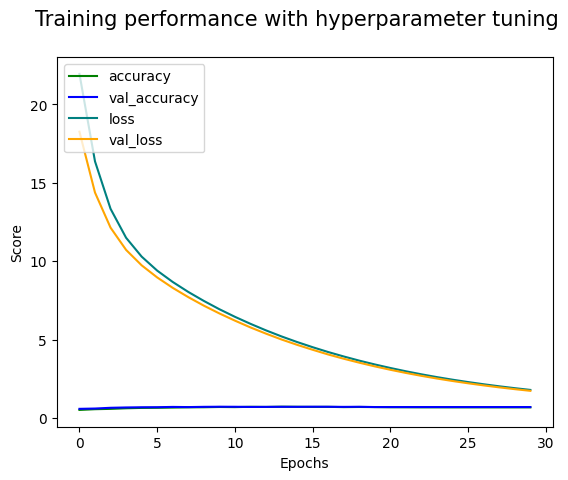

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color="green", label='accuracy')
plt.plot(hist.history['val_accuracy'], color="blue", label="val_accuracy")
plt.plot(hist.history['loss'], color="teal", label='loss')
plt.plot(hist.history['val_loss'], color="orange", label="val_loss")
fig.suptitle('Training performance with hyperparameter tuning', fontsize=15)
plt.ylabel("Score")
plt.xlabel("Epochs")
plt.legend(loc= 'upper left')
plt.show()

In [48]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Test accuracy: {accuracy * 100:.2f}%')

24/24 [==============================] - 0s 8ms/step - loss: 1.7265 - accuracy: 0.6922
Test accuracy: 69.22%


In [58]:
model.save('best.h5')

In [51]:
# fn

In [75]:
model_pepper = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(name='flat'),
])

In [80]:
featureX = tf.keras.backend.function(model_pepper.input, model_pepper.get_layer('flat').output)
##################image input#####################
in_path = 'img/path/here' #<---image data we can put any image here
imgIN = tf.keras.preprocessing.image.load_img(in_path, target_size=(224, 224))
imgIN = tf.keras.preprocessing.image.img_to_array(imgIN)
imgIN = np.expand_dims(imgIN, axis=0)
#############numerical input######################
numIN = np.array([1,1,1,1,1,1,1,1,1,1,1])#<---numerical data

result = featureX(imgIN)
result = result.flatten() 
result = np.concatenate((result, numIN))
print(result)

[0.         4.36048794 6.34444618 ... 1.         1.         1.        ]


In [81]:
user_df = pd.DataFrame(result).T

In [82]:
user_df

,0,1,2,3,4,5,6,7,8,9,...,86529,86530,86531,86532,86533,86534,86535,86536,86537,86538
0,0.0,4.360488,6.344446,0.0,0.175425,12.421194,0.0,0.219207,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [83]:
yhat = model.predict(user_df)
yhat

1/1 [==============================] - 0s 55ms/step


array([[0.8885306 , 0.11146931]], dtype=float32)

In [ ]:
#nice